<a href="https://colab.research.google.com/github/Pravallika-02-datascience/Internship/blob/main/Mainflowintern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 **

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#step 1 : load the data set
student=pd.read_csv("/content/student-mat.csv")

In [ ]:
#load the data into a dataframe
student=pd.read_csv("/content/student-mat.csv",sep=";")
print("DATA LOADED SUCCESSFULLY ")

DATA LOADED SUCCESSFULLY 


In [ ]:
#Data Exploration
print(student.head())
print(student.info())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

In [ ]:
#step 3
 #data cleaning
print(student.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:
#remove duplicates
student=(student.drop_duplicates())

In [ ]:
#Step  4
#data analysis

#average score in math?
avg_score=student['G3'].mean()
print("Average score in maths :",avg_score)
#students who score above 15 in the final grade
stu_above_15=len(student[student['G3']>15])
print("Students who scored above 15 : ",stu_above_15)
#corelation between study time and final grade
correlation=student['studytime'].corr(student['G3'])
print("correlation between study and grade ",correlation)
#which gender has highest avg final grade
gender=student.groupby('sex')['G3'].mean()
print("gender has highest avg final grade ",gender)


Average score in maths : 10.415189873417722
Students who scored above 15 :  40
correlation between study and grade  0.09781968965319626
gender has highest avg final grade  sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


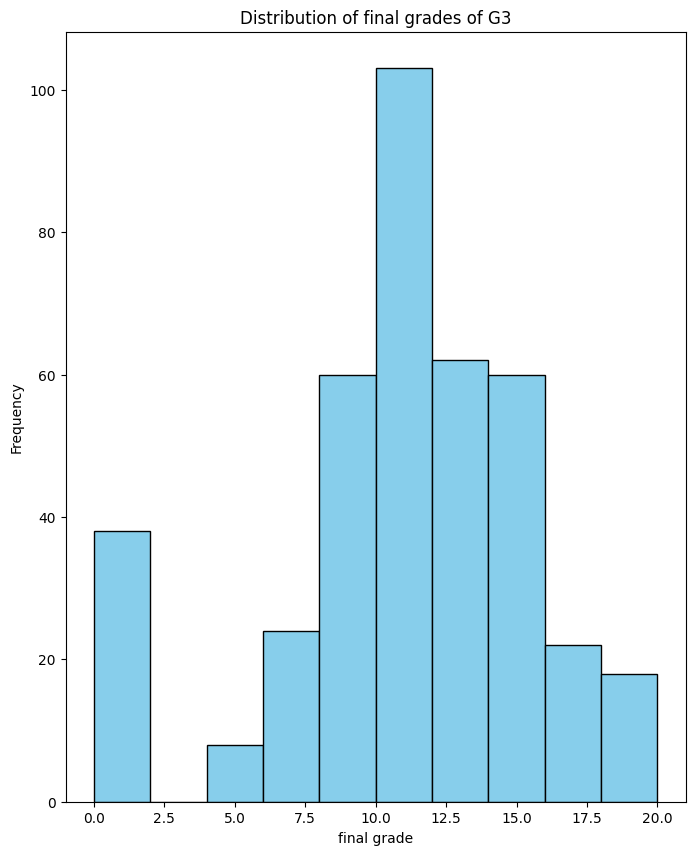

In [ ]:
#step  5
#data visualization
#histogram of final grades
plt.figure(figsize=(8,10))
plt.hist(student['G3'],bins=10,color='skyblue',edgecolor='black')
plt.title("Distribution of final grades of G3")
plt.xlabel('final grade')
plt.ylabel('Frequency')
plt.show()

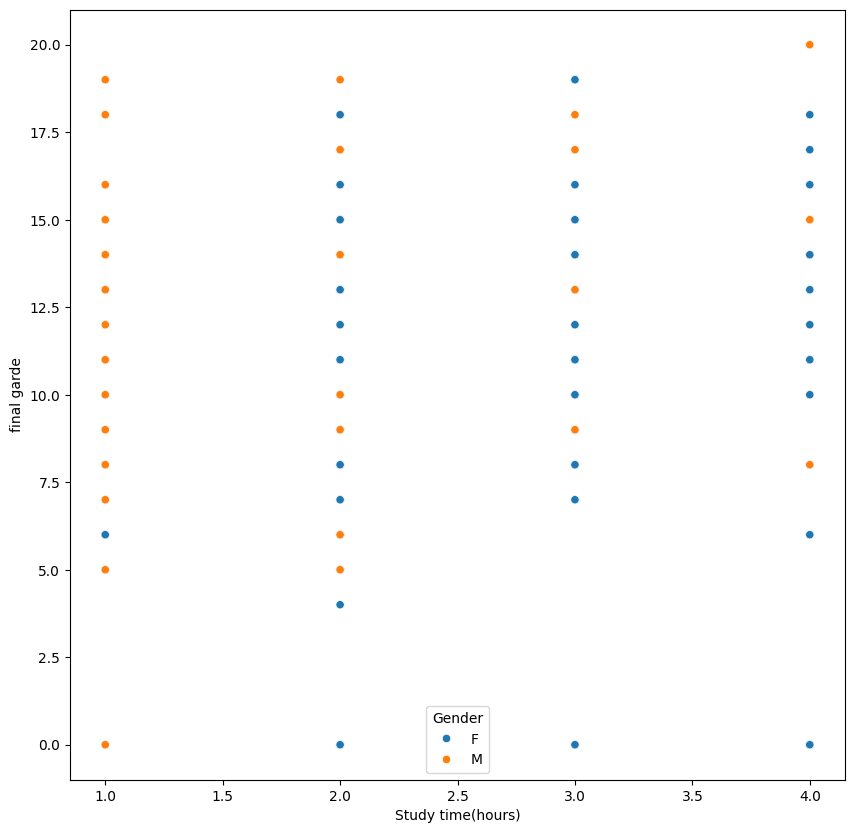

In [ ]:
#scatterplot of study time vs final gade
plt.figure(figsize=(10,10))
sns.scatterplot(data=student,x='studytime',y='G3',hue='sex')
plt.title=("study time vs final grade")
plt.xlabel("Study time(hours)")
plt.ylabel("final garde")
plt.legend(title='Gender')
plt.show()

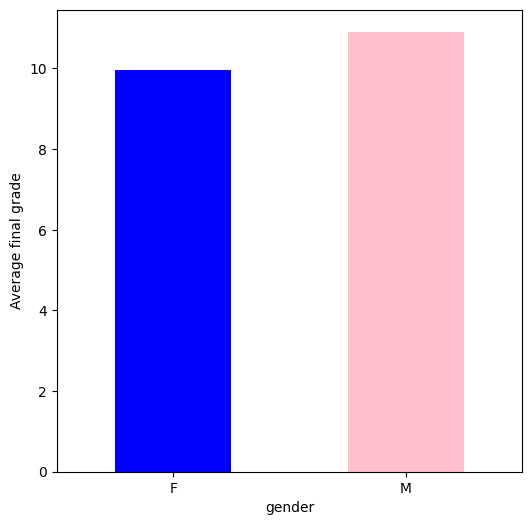

In [ ]:
#Bar chart of average scores by gender
plt.figure(figsize=(6,6))
gender.plot(kind='bar',color=['blue','pink'])
plt.title=("Average final garde by gender")
plt.ylabel("Average final grade")
plt.xlabel("gender")
plt.xticks(rotation=1)
plt.show()

# TASK 2

# **Synthetic dataset for task 2 **


In [4]:
!pip install faker

import pandas as pd
import random
from faker import Faker
import numpy as np

fake = Faker()

# Define sample data for each field
regions = ["North America", "Europe", "Asia", "South America", "Africa", "Oceania"]
countries_by_region = {
    "North America": ["USA", "Canada", "Mexico"],
    "Europe": ["Germany", "France", "UK", "Spain"],
    "Asia": ["India", "China", "Japan", "Singapore"],
    "South America": ["Brazil", "Argentina", "Chile"],
    "Africa": ["South Africa", "Nigeria", "Egypt"],
    "Oceania": ["Australia", "New Zealand"]
}

product_categories = {
    "Furniture": ["Chairs", "Tables", "Bookcases", "Furnishings"],
    "Office Supplies": ["Binders", "Paper", "Art", "Labels"],
    "Technology": ["Phones", "Accessories", "Copiers", "Machines"]
}

product_names = {
    "Chairs": ["Ergonomic Office Chair", "Executive Leather Chair"],
    "Tables": ["Conference Table", "Adjustable Desk"],
    "Bookcases": ["Wooden Bookcase", "Metal Shelf"],
    "Furnishings": ["Desk Lamp", "Wall Clock"],
    "Binders": ["Avery Ring Binder", "Staples Binder"],
    "Paper": ["Multipurpose Paper", "Notebook Pack"],
    "Art": ["Color Markers", "Paint Brush Set"],
    "Labels": ["Sticky Labels", "Address Labels"],
    "Phones": ["iPhone 14", "Samsung Galaxy S23"],
    "Accessories": ["Wireless Mouse", "USB-C Hub"],
    "Copiers": ["HP Copier", "Canon Office Copier"],
    "Machines": ["3D Printer", "Fax Machine"]
}

# Generate dataset
num_rows = 1000
data = []

for _ in range(num_rows):
    order_id = f"{fake.country_code()}-{fake.year()}-{random.randint(10000, 99999)}"
    order_date = fake.date_between(start_date='-2y', end_date='today')
    region = random.choice(regions)
    country = random.choice(countries_by_region[region])
    category = random.choice(list(product_categories.keys()))
    sub_category = random.choice(product_categories[category])
    product = random.choice(product_names[sub_category])
    sales = round(random.uniform(10, 5000), 2)
    profit = round(sales * random.uniform(-0.2, 0.3), 2)
    quantity = random.randint(1, 10)
    discount = round(random.choice([0, 0.1, 0.2, 0.3]), 2)

    data.append([
        order_id, order_date, region, country,
        category, sub_category, product, sales,
        profit, quantity, discount
    ])

# Create DataFrame and save
columns = ["Order ID", "Order Date", "Region", "Country", "Product Category",
           "Sub-Category", "Product Name", "Sales", "Profit", "Quantity", "Discount"]

df = pd.DataFrame(data, columns=columns)
df.to_csv("Synthetic_Global_Superstore.csv", index=False)

print("✅ CSV file 'Synthetic_Global_Superstore.csv' has been created.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.7 MB/s eta 0:00:00
✅ CSV file 'Synthetic_Global_Superstore.csv' has been created.


EXPLORATORY DATA ANALYSIS(EDA)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
P=pd.read_csv('Synthetic_Global_Superstore.csv')

In [7]:
#Display first few rows
display(P.head())

,Order ID,Order Date,Region,Country,Product Category,Sub-Category,Product Name,Sales,Profit,Quantity,Discount
0,GE-2012-79370,2023-12-08,Asia,China,Office Supplies,Labels,Address Labels,582.46,-5.17,5,0.0
1,TW-1978-91608,2024-12-04,Europe,Germany,Furniture,Chairs,Ergonomic Office Chair,1760.02,365.29,8,0.1
2,GH-1985-85888,2024-12-29,Europe,France,Furniture,Chairs,Executive Leather Chair,1128.25,-120.02,8,0.2
3,LV-1980-49084,2024-11-19,Africa,Nigeria,Furniture,Furnishings,Wall Clock,2131.47,-205.24,2,0.3
4,PA-2013-18717,2023-08-17,Europe,UK,Technology,Copiers,HP Copier,1621.20,332.65,8,0.3


In [8]:
#Bsic information
P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1000 non-null   object 
 1   Order Date        1000 non-null   object 
 2   Region            1000 non-null   object 
 3   Country           1000 non-null   object 
 4   Product Category  1000 non-null   object 
 5   Sub-Category      1000 non-null   object 
 6   Product Name      1000 non-null   object 
 7   Sales             1000 non-null   float64
 8   Profit            1000 non-null   float64
 9   Quantity          1000 non-null   int64  
 10  Discount          1000 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


In [9]:
#Statistical summary
display(P.describe())

,Sales,Profit,Quantity,Discount
count,1000.00000,1000.000000,1000.000000,1000.00000
mean,2283.02966,125.011410,5.655000,0.15180
std,1436.32023,400.098516,2.860797,0.11476
min,10.23000,-960.950000,1.000000,0.00000
25%,1015.59250,-100.080000,3.000000,0.00000
50%,2160.69000,58.215000,6.000000,0.20000
75%,3500.27750,330.290000,8.000000,0.30000
max,4993.54000,1379.870000,10.000000,0.30000


In [10]:
#check for duplicates
duplicates=P.duplicated().sum()

print(duplicates)

0


In [11]:
#handling missing values
print(P.isnull().sum())

Order ID            0
Order Date          0
Region              0
Country             0
Product Category    0
Sub-Category        0
Product Name        0
Sales               0
Profit              0
Quantity            0
Discount            0
dtype: int64


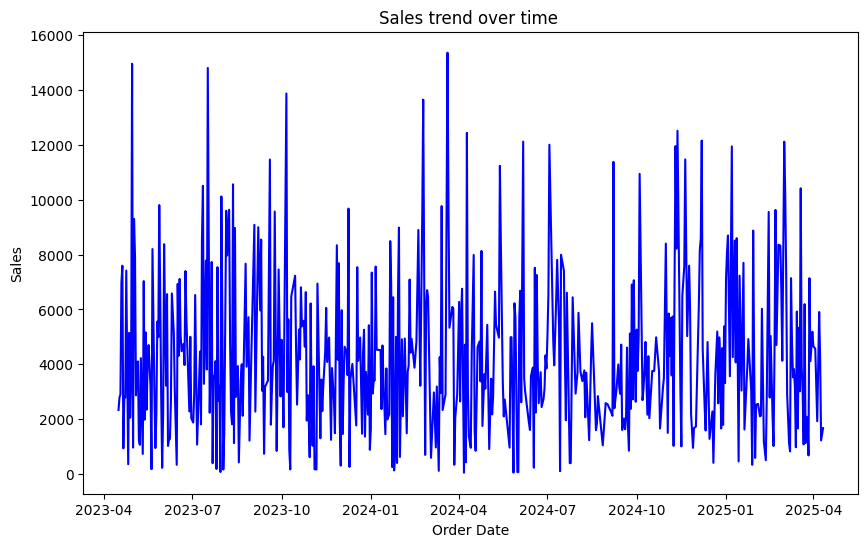

In [12]:
#plot sales trend over quality
plt.figure(figsize=(10,6))
df.groupby('Order Date')['Sales'].sum().plot(kind='line',color='blue')
plt.title('Sales trend over time ')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

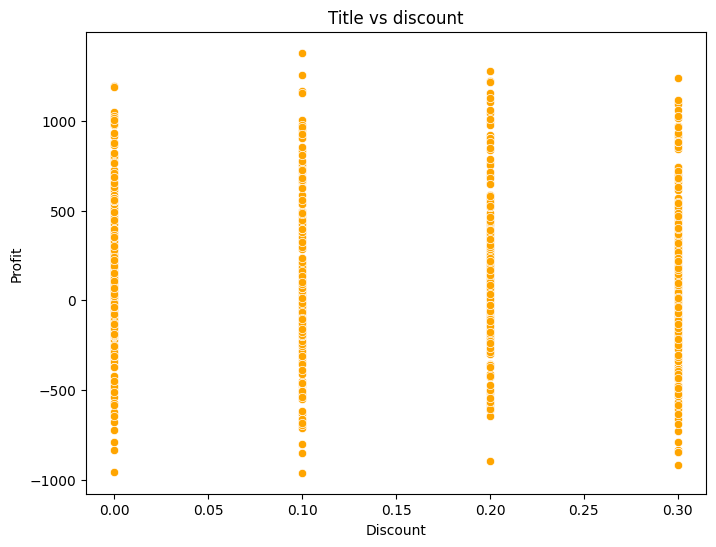

In [14]:
#Scatter plot: profit vs discount
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount',y='Profit',data=P,color='orange')
plt.title('Title vs discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

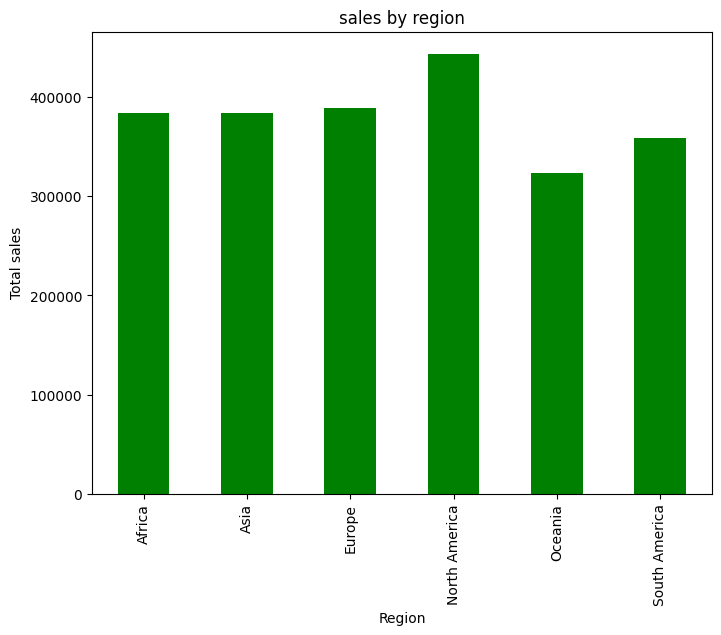

In [16]:
#sales distribution by region
plt.figure(figsize=(8,6))
region_sales=P.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar',color='green')
plt.title('sales by region')
plt.ylabel('Total sales')
plt.show()

In [17]:
#heatmap for correlations
plt.figure(figsize=(8,6))
sns.heatmap(P.corr(),annot=True,cmap='coolwarm')
plt.title('Correaltion matrix')
plt.show()

ValueError: could not convert string to float: 'GE-2012-79370'

<Figure size 800x600 with 0 Axes>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
#select features and target
X=P[['Profit','Discount']]
y=P['Sales']

In [20]:
#split the dataset into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
#train the linear regression model
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [22]:
#make predictions
y_pred=model.predict(X_test)

In [23]:
#evaluate the model
print(f"Mean squared Error:{mean_squared_error(y_test,y_pred):.2f}")
print(f"R-Square score:{r2_score(y_test,y_pred):.2f}")

Mean squared Error:1994372.31
R-Square score:0.03


# **TASK 3**


In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_customers = 200
customer_ids = np.arange(1, num_customers + 1)
ages = np.random.randint(18, 70, size=num_customers)
annual_incomes = np.random.randint(15000, 100000, size=num_customers)
spending_scores = np.random.randint(1, 101, size=num_customers)

# Create DataFrame
synthetic_df = pd.DataFrame({
    'Customer ID': customer_ids,
    'Age': ages,
    'Annual Income': annual_incomes,
    'Spending Score': spending_scores
})

# Save to CSV
synthetic_df.to_csv("synthetic_customer_data.csv", index=False)
print("CSV file 'synthetic_customer_data.csv' has been created.")


CSV file 'synthetic_customer_data.csv' has been created.


In [2]:
#importing neccessaary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
#load the dataset

D=pd.read_csv("synthetic_customer_data.csv")

In [5]:
#displaying first few rows of dataset
print(D.head())

   Customer ID  Age  Annual Income  Spending Score
0            1   56          73053              58
1            2   69          36959              86
2            3   46          20530              49
3            4   32          18748              52
4            5   60          28545              42


In [6]:
#description of the dataset
print(D.describe())

       Customer ID        Age  Annual Income  Spending Score
count   200.000000  200.00000     200.000000      200.000000
mean    100.500000   43.42500   55589.495000       51.555000
std      57.879185   14.94191   24393.930013       30.210268
min       1.000000   18.00000   15301.000000        1.000000
25%      50.750000   31.00000   34070.250000       23.750000
50%     100.500000   43.50000   58250.000000       52.000000
75%     150.250000   56.00000   75806.500000       78.000000
max     200.000000   69.00000   99896.000000      100.000000


In [7]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual Income   200 non-null    int64
 3   Spending Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [8]:
# checking the missing values
print(D.isnull().sum())

Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64


In [10]:
col=D[['Customer ID','Age','Annual Income','Spending Score']]

In [13]:
#standardizing the data
scaler=StandardScaler()
scaled_features=scaler.fit_transform(col)
print(scaled_features[:10])

[[-1.7234121   0.84370444  0.71769199  0.21387342]
 [-1.70609137  1.71592374 -0.7656514   1.14303644]
 [-1.68877065  0.17276652 -1.44082867 -0.08478613]
 [-1.67144992 -0.76654658 -1.51406295  0.01476706]
 [-1.6541292   1.11207961 -1.11143882 -0.31707688]
 [-1.63680847 -1.23620312  1.0524655   0.61208614]
 [-1.61948775 -0.36398382 -0.23932628 -1.21305551]
 [-1.60216702  0.84370444  1.35374523  0.08113584]
 [-1.5848463  -0.49817141  0.8423793   0.2802422 ]
 [-1.56752558 -0.22979624  1.16100182  1.50806477]]


In [15]:
#elbow method to find the optimal number of clusters
inertia=[]
k_range=range(1,11)

for k in k_range:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)



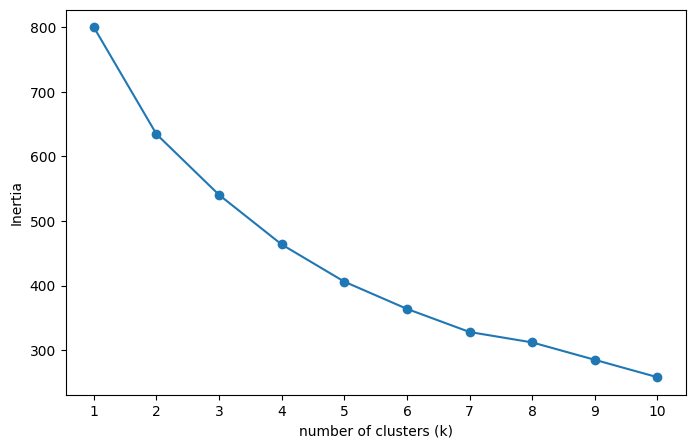

In [16]:
#plot the elbow method graph
plt.figure(figsize=(8,5))
plt.plot(k_range,inertia,marker='o')
plt.title=('elbow method for optimal k')
plt.xlabel('number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

In [17]:
#Perform K-means clustering with the optimal k (from the elbow method,assme k=3 here)
optimal_k =3
kmeans =KMeans(n_clusters= optimal_k ,random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
#Add cluster labels to the original dataset
D['Cluster'] = cluster_labels
#Display the rows
print(D.head())

   Customer ID  Age  Annual Income  Spending Score  Cluster
0            1   56          73053              58        2
1            2   69          36959              86        2
2            3   46          20530              49        2
3            4   32          18748              52        0
4            5   60          28545              42        2


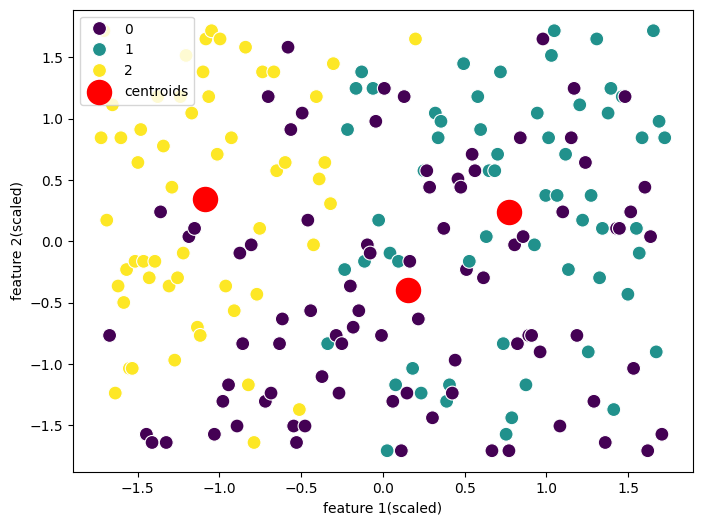

In [20]:
#Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_features[:,0],y=scaled_features[:,1],hue=cluster_labels,palette='viridis',s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='centroids')
plt.title=('customer segments')
plt.xlabel('feature 1(scaled)')
plt.ylabel('feature 2(scaled)')
plt.legend()
plt.show()

# **TASK 4 **

In [2]:
#SYNTHETIC DATASET
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(2025)

# Parameters
num_samples = 200
locations = ['urban', 'suburban', 'rural']

# Generate synthetic data
sizes = np.random.randint(600, 4000, size=num_samples)  # square feet
location = np.random.choice(locations, size=num_samples, p=[0.4, 0.4, 0.2])
rooms = np.random.randint(1, 8, size=num_samples)

# Define base price per sqft by location
base_price_per_sqft = {
    'urban': 300,
    'suburban': 200,
    'rural': 120
}

# Generate price using a realistic formula
price = [
    int(sizes[i] * base_price_per_sqft[location[i]] + rooms[i] * 10000 + np.random.randint(-20000, 20000))
    for i in range(num_samples)
]

# Create DataFrame
house_df = pd.DataFrame({
    'Size': sizes,
    'Location': location,
    'Number of Rooms': rooms,
    'Price': price
})

# Save to CSV
house_df.to_csv("house_prices.csv", index=False)
print("CSV file 'house_prices.csv' has been created.")


CSV file 'house_prices.csv' has been created.


In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
#LOAD THE DATA SET
P=pd.read_csv('house_prices.csv')

In [16]:
#INFO DESCRIPTION OF DATA SET
P.head()

,Size,Number of Rooms,Price,Location_suburban,Location_urban
0,3222,7,1018413.0,False,True
1,3510,1,1069047.0,False,True
2,923,4,329628.0,False,True
3,1835,6,280616.0,False,False
4,2532,5,829054.0,False,True


In [6]:
P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             200 non-null    int64 
 1   Location         200 non-null    object
 2   Number of Rooms  200 non-null    int64 
 3   Price            200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [17]:
P.describe()

,Size,Number of Rooms,Price
count,200.000000,200.000000,2.000000e+02
mean,2237.795000,3.985000,5.430449e+05
std,945.859665,2.011219,2.780150e+05
min,640.000000,1.000000,1.322270e+05
25%,1423.250000,2.000000,3.207712e+05
50%,2113.500000,4.000000,4.758230e+05
75%,3058.750000,6.000000,7.482172e+05
max,3987.000000,7.000000,1.112354e+06


In [18]:
#MISSING VALUES '
P.isnull().sum()

,0
Size,0
Number of Rooms,0
Price,0
Location_suburban,0
Location_urban,0


In [9]:
#HANDLE OUTLIERS
upp_lim=P['Price'].quantile(0.95)
P['Price']=np.where(P['Price']>upp_lim,upp_lim,P['Price'])


In [19]:
#ecoding location colunm
P=pd.get_dummies(P,columns=['Location'],drop_first=True)


KeyError: "None of [Index(['Location'], dtype='object')] are in the [columns]"

In [20]:
from sklearn.preprocessing import MinMaxScaler

#normalize numerical columns
scaler=MinMaxScaler()
P[['Sizs','Number of Rooms']]=scaler.fit_transform(P[['Size','Number of Rooms']])

In [22]:
#define features and target variable
X=P.drop('Price',axis=1)
y=P['Price']

In [23]:
#split the dataset into training and testing test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size :{X_test.shape}")


Training set size: (160, 5)
Testing set size :(40, 5)


In [24]:
#initialize and train the model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
#Display coefficients
print("Model coefficents:",model.coef_)
print("Interpret",model.intercept_)

Model coefficents: [2.22030662e+02 7.61727905e+04 1.74003380e+05 3.97151388e+05
 6.63372159e-02]
Interpret -224606.95243363036


In [27]:
#make predictions on test set
y_pred=model.predict(X_test)

In [31]:
#evaluate the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"RMSE: ",rmse)
print(f"R2 :",r2)

RMSE:  67786.2886863014
R2 : 0.9475956388210007


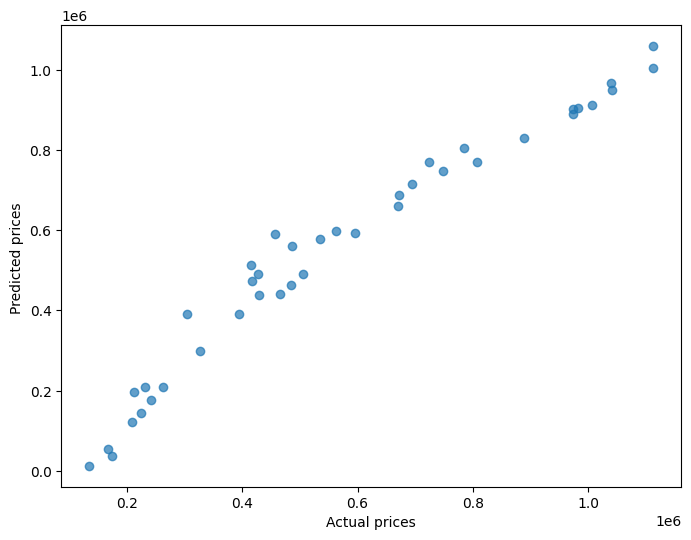

In [32]:
#scatter plot of actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.7)
plt.title=("Actual vs Predicted prices ")
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices ")
plt.show()

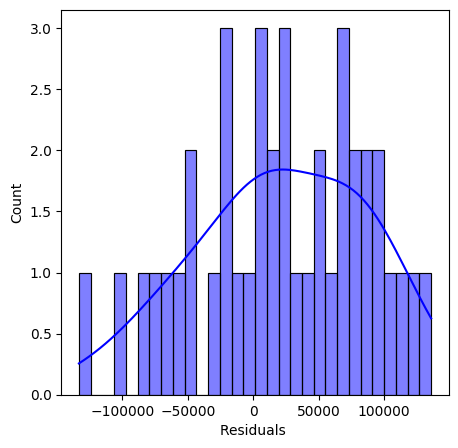

In [34]:
#residual plot
residuals=y_test - y_pred
plt.figure(figsize=(5,5))
sns.histplot(residuals,kde=True,bins=30,color='blue')
plt.title=("Distributions of Residuals ")
plt.xlabel("Residuals ")
plt.show()

# **TASK 5 **

In [1]:
import pandas as pd

# Creating the dataset
data = {
    "Study Hours": [4, 10, 2, 8, 6, 1, 12, 3, 9, 5],
    "Attendance": [60, 85, 50, 75, 70, 40, 90, 55, 80, 65],
    "Pass": [0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)
print(df)


   Study Hours  Attendance  Pass
0            4          60     0
1           10          85     1
2            2          50     0
3            8          75     1
4            6          70     1
5            1          40     0
6           12          90     1
7            3          55     0
8            9          80     1
9            5          65     0


In [2]:
df = pd.DataFrame(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Study Hours  10 non-null     int64
 1   Attendance   10 non-null     int64
 2   Pass         10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


In [4]:
df.describe()

,Study Hours,Attendance,Pass
count,10.000000,10.00000,10.000000
mean,6.000000,67.00000,0.500000
std,3.651484,16.02082,0.527046
min,1.000000,40.00000,0.000000
25%,3.250000,56.25000,0.000000
50%,5.500000,67.50000,0.500000
75%,8.750000,78.75000,1.000000
max,12.000000,90.00000,1.000000


In [5]:
df.head()

,Study Hours,Attendance,Pass
0,4,60,0
1,10,85,1
2,2,50,0
3,8,75,1
4,6,70,1


Missing Values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64


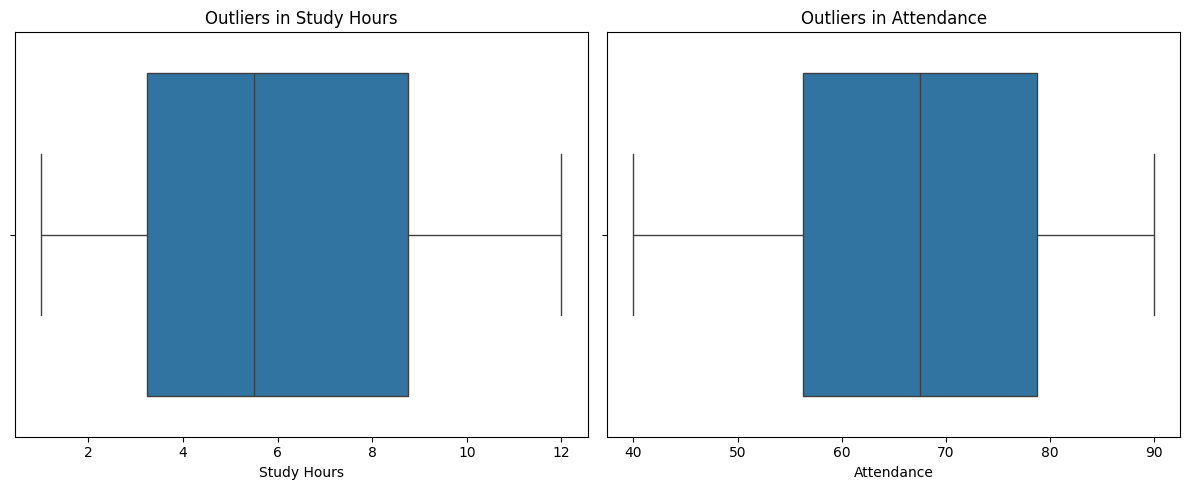

In [8]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

import matplotlib.pyplot as plt
# Detecting outliers using boxplots
plt.figure(figsize=(12, 5))


import seaborn as sns
plt.subplot(1, 2, 1)
sns.boxplot(x=df["Study Hours"])
plt.title("Outliers in Study Hours")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Attendance"])
plt.title("Outliers in Attendance")

plt.tight_layout()
plt.show()

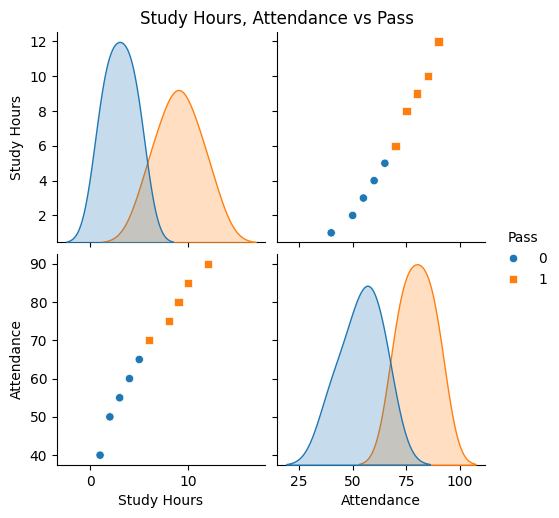

In [9]:
# Pairplot with Pass as hue
sns.pairplot(df, hue="Pass", markers=["o", "s"])
plt.suptitle("Study Hours, Attendance vs Pass", y=1.02)
plt.show()


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Features and target
X = df[["Study Hours", "Attendance"]]
y = df["Pass"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 1.00
Confusion Matrix:
 [[1 0]
 [0 2]]


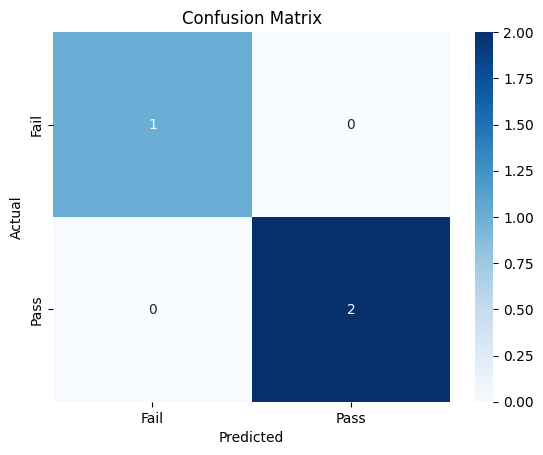

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **TASK 5 (B)**

In [12]:
import pandas as pd

# Create a synthetic reviews dataset
data = {
    "Review Text": [
        "I loved the product! It was exactly what I needed.",
        "Terrible experience. Will not buy again.",
        "Great quality and fast shipping.",
        "Not worth the price. Very disappointed.",
        "Excellent! Highly recommend this to everyone.",
        "The item broke after one use. Poor quality.",
        "Amazing service and very helpful staff.",
        "Didn't work as expected. Waste of money.",
        "Superb experience. Five stars.",
        "This was a bad choice. Regret buying it."
    ],
    "Sentiment": [
        "positive", "negative", "positive", "negative", "positive",
        "negative", "positive", "negative", "positive", "negative"
    ]
}

# Create DataFrame
reviews_df = pd.DataFrame(data)

# Preview dataset
print(reviews_df)


                                         Review Text Sentiment
0  I loved the product! It was exactly what I nee...  positive
1           Terrible experience. Will not buy again.  negative
2                   Great quality and fast shipping.  positive
3            Not worth the price. Very disappointed.  negative
4      Excellent! Highly recommend this to everyone.  positive
5        The item broke after one use. Poor quality.  negative
6            Amazing service and very helpful staff.  positive
7           Didn't work as expected. Waste of money.  negative
8                     Superb experience. Five stars.  positive
9           This was a bad choice. Regret buying it.  negative


In [17]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Synthetic Dataset
data = {
    "Review Text": [
        "I loved the product! It was exactly what I needed.",
        "Terrible experience. Will not buy again.",
        "Great quality and fast shipping.",
        "Not worth the price. Very disappointed.",
        "Excellent! Highly recommend this to everyone.",
        "The item broke after one use. Poor quality.",
        "Amazing service and very helpful staff.",
        "Didn't work as expected. Waste of money.",
        "Superb experience. Five stars.",
        "This was a bad choice. Regret buying it."
    ],
    "Sentiment": [
        "positive", "negative", "positive", "negative", "positive",
        "negative", "positive", "negative", "positive", "negative"
    ]
}
df = pd.DataFrame(data)

# 2. Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

df['cleaned'] = df['Review Text'].apply(clean_text)

# 3. Vectorization with TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])

# Encode target
y = df['Sentiment'].map({'positive': 1, 'negative': 0})

# 4. Split Data & Train Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         1
    Positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
